### Business Understanding

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA. WA. [(source)](https://www.kaggle.com/airbnb/seattle/home)

[Here](https://www.kaggle.com/airbnb/seattle/data), you will find the listing.csv datasets, it has specifc infomation about the listing such as its full descriptions, average review score, neighbourhood, amenity, picture_url, host information, etc.

Q:
Can we use other listing information to predict the housing price?

### 2- Data Understanding

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. If we decided to build some basic plots, matplotlib might prove useful as well.

In [285]:
#import needed packeges
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV

#import dataset
df_listings = pd.read_csv('./listings.csv')

In [210]:
# Display the 5 first record
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [211]:
#for more data understanding let's look at the listings data types
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [212]:
# Data shape
df_listings.shape

(3818, 92)

In [402]:
#Total capacity count of listings
accommodates_counts = df_listings['accommodates'].value_counts()
accommodates_counts

2     1627
4      785
3      398
6      332
1      256
5      184
8      119
7       52
10      25
12      15
9       13
16       4
11       3
14       3
15       2
Name: accommodates, dtype: int64

In [404]:
#Total capacity count of listings percentage
accommodates_counts_perc = accommodates_counts/accommodates_counts.sum()
accommodates_counts_perc

2     0.426139
4     0.205605
3     0.104243
6     0.086957
1     0.067051
5     0.048193
8     0.031168
7     0.013620
10    0.006548
12    0.003929
9     0.003405
16    0.001048
11    0.000786
14    0.000786
15    0.000524
Name: accommodates, dtype: float64

Text(0, 0.5, 'count')

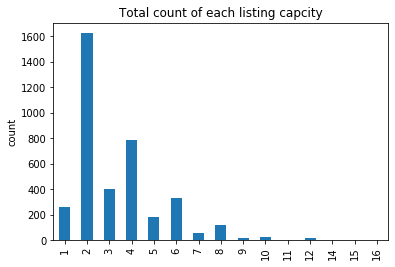

In [417]:
#Plot showing the total count of each listing capcity
accommodates_counts.sort_index().plot(kind = 'bar')
plt.title('Total count of each listing capcity')
plt.ylabel('count')

In [407]:
#Total bedroom count for each bedroom size type
bedrooms_counts = df_listings['bedrooms'].value_counts()
bedrooms_counts

1.0    2417
2.0     640
0.0     372
3.0     283
4.0      69
5.0      24
6.0       6
7.0       1
Name: bedrooms, dtype: int64

In [408]:
#Total bedroom count for each bedroom size type
bedrooms_counts_perc = bedrooms_counts/bedrooms_counts.sum()
bedrooms_counts_perc

1.0    0.634050
2.0    0.167891
0.0    0.097587
3.0    0.074239
4.0    0.018101
5.0    0.006296
6.0    0.001574
7.0    0.000262
Name: bedrooms, dtype: float64

Text(0, 0.5, 'count')

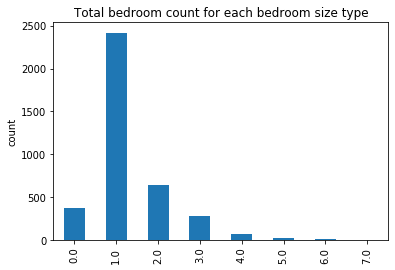

In [416]:
#Plot total bedroom count for each bedroom size type
bedrooms_counts.sort_index().plot(kind = 'bar')
plt.title('Total bedroom count for each bedroom size type')
plt.ylabel('count')

In [421]:
#Exploring the neighbourhood_group_cleansed variable
df_listings['neighbourhood'].value_counts()[:10]

Capitol Hill           351
Ballard                213
Belltown               204
Minor                  192
Queen Anne             187
Fremont                148
Wallingford            143
University District    107
First Hill             105
Stevens                 98
Name: neighbourhood, dtype: int64

In [414]:
#Exploring the neighbourhood_group_cleansed variable
df_listings['neighbourhood_group_cleansed'].value_counts()[:10]

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Name: neighbourhood_group_cleansed, dtype: int64

In [420]:
#cancellation policy
df_listings['cancellation_policy'].value_counts()/df_listings['cancellation_policy'].value_counts().sum()

strict      0.371137
moderate    0.327658
flexible    0.301205
Name: cancellation_policy, dtype: float64

In [213]:
# Get a subset of data
list_var = ['summary', 'space', 'description', 'host_response_time',
            'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
            'neighbourhood_group_cleansed', 'property_type', 'room_type',
            'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
            'amenities', 'price', 'cleaning_fee', 'minimum_nights',
            'maximum_nights', 'instant_bookable',  'cancellation_policy',
            'review_scores_rating', 'review_scores_accuracy',
            'review_scores_cleanliness', 'review_scores_checkin',
            'review_scores_communication', 'review_scores_location',
            'review_scores_value', 'number_of_reviews', 'security_deposit']

df = df_listings[list_var]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   summary                       3641 non-null   object 
 1   space                         3249 non-null   object 
 2   description                   3818 non-null   object 
 3   host_response_time            3295 non-null   object 
 4   host_response_rate            3295 non-null   object 
 5   host_acceptance_rate          3045 non-null   object 
 6   host_is_superhost             3816 non-null   object 
 7   neighbourhood_group_cleansed  3818 non-null   object 
 8   property_type                 3817 non-null   object 
 9   room_type                     3818 non-null   object 
 10  accommodates                  3818 non-null   int64  
 11  bathrooms                     3802 non-null   float64
 12  bedrooms                      3812 non-null   float64
 13  bed

### Variables classification

After a quick look at the variables of our dataset we can classif them into 5 categories:<br>
DESCRIPTIONS : summary, space, description.<br>
HOST : host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost.<br>
HOME DETAILS : property_type, room_type, accomodates, bathrooms, bedrooms, beds, bed_type, amenities.<br>
LISTING ELEMENTS : price, cleaning_fee, extra_people, minimum_nights, maximum_nights, instant_bookable, cancellation policy.<br>
SCORES : review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, number_of_reviews

In [214]:
# Look at the 10 first variable
df.iloc[:5, 0:10]

,summary,space,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,within a few hours,96%,100%,f,Queen Anne,Apartment,Entire home/apt
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,within an hour,98%,100%,t,Queen Anne,Apartment,Entire home/apt
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,within a few hours,67%,100%,f,Queen Anne,House,Entire home/apt
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,f,Queen Anne,Apartment,Entire home/apt
4,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,within an hour,100%,NaN,f,Queen Anne,House,Entire home/apt


In [215]:
# Look at the rest of variable
df.iloc[:5, 22:]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,security_deposit
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,207,NaN
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0,43,$100.00
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0,20,"$1,000.00"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0,38,$700.00


In [216]:
# Look at the 12 second variable
df.iloc[:5, 10:22]

,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,1,365,f,moderate
1,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,$40.00,2,90,f,strict
2,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,$300.00,4,30,f,strict
3,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,NaN,1,1125,f,flexible
4,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,$125.00,1,1125,f,strict


<h3>3-Data preparation</h3>

In [217]:
df_lst = df 
# Drop original variable
df_lst = df_lst.drop(['summary', 'space', 'description', 'amenities','cleaning_fee', 'security_deposit'], axis=1)

In [218]:
df_lst.shape

(3818, 25)

In [219]:
df_lst['summary_length'] = df['summary'].str.len()
df_lst['space_length'] = df['space'].str.len()
df_lst['description_length'] = df['description'].str.len()
df_lst['amenities_length'] = df['amenities'].str.len()

In [220]:
# columns to be replaced with binary flags.
replacing_cols = ['cleaning_fee', 'security_deposit']

# Adding 'has_' columns to show information availabilities.
for col in replacing_cols:
    df_lst['has_' + col] = df[col].notnull().astype(int)

In [221]:
# Checking distribution of newly added columns.-> Seems OK.
df_lst[['has_' + col for col in replacing_cols]].describe()

,has_cleaning_fee,has_security_deposit
count,3818.000000,3818.000000
mean,0.730225,0.488738
std,0.443901,0.499939
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [222]:
df_lst.shape


(3818, 31)

In [223]:
# Collect 'review' including columns
review_cols = []
for col in df_lst.columns.values:
    if 'review' in col:
        review_cols.append(col)

review_cols

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'number_of_reviews']

In [224]:
# Original score columns are imputed with mean.
for col in review_cols:
    if 'review_scores_' in col:  # filering review score columns
        df_lst[col].fillna(df_lst[col].mean(), inplace=True)


In [225]:
df_lst.shape

(3818, 31)

In [226]:
df_lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            3295 non-null   object 
 1   host_response_rate            3295 non-null   object 
 2   host_acceptance_rate          3045 non-null   object 
 3   host_is_superhost             3816 non-null   object 
 4   neighbourhood_group_cleansed  3818 non-null   object 
 5   property_type                 3817 non-null   object 
 6   room_type                     3818 non-null   object 
 7   accommodates                  3818 non-null   int64  
 8   bathrooms                     3802 non-null   float64
 9   bedrooms                      3812 non-null   float64
 10  beds                          3817 non-null   float64
 11  bed_type                      3818 non-null   object 
 12  price                         3818 non-null   object 
 13  min

In [227]:
# Full nan values by 0
df_lst['summary_length'].fillna(0, inplace=True)
df_lst['space_length'].fillna(0, inplace=True)
df_lst['description_length'].fillna(0, inplace=True)
df_lst['amenities_length'].fillna(0, inplace=True)

df_lst.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,summary_length,space_length,description_length,amenities_length,has_cleaning_fee,has_security_deposit
0,within a few hours,96%,100%,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,10.000000,9.000000,10.000000,207,0.0,1000.0,1000,114,0,0
1,within an hour,98%,100%,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,10.000000,10.000000,10.000000,43,249.0,1000.0,1000,243,1,1
2,within a few hours,67%,100%,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,...,10.000000,10.000000,10.000000,20,241.0,1000.0,1000,291,1,1
3,NaN,NaN,NaN,f,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,...,9.809599,9.608916,9.452245,0,243.0,0.0,243,197,0,0
4,within an hour,100%,NaN,f,Queen Anne,House,Entire home/apt,6,2.0,3.0,...,10.000000,9.000000,9.000000,38,184.0,488.0,1000,181,1,1


In [228]:
# Convert host_response_time to integers
df_lst['host_response_time'].replace('within an hour', 1, inplace=True)
df_lst['host_response_time'].replace('within a few hours', 2, inplace=True)
df_lst['host_response_time'].replace('within a day', 3, inplace=True)
df_lst['host_response_time'].replace('a few days or more', 4, inplace=True)

# Impute missing values using forward-fill method
df_lst['host_response_time'].fillna(method='ffill', inplace=True)

In [229]:
# Count host_response_time values
df_lst['host_response_time'].value_counts(dropna=False)

1.0    1961
2.0    1104
3.0     705
4.0      48
Name: host_response_time, dtype: int64

In [230]:
# Convert host_response_rate and host_acceptance_rate to number between 0 and 1
df_lst['host_acceptance_rate'] = df_lst['host_acceptance_rate'].replace('%', '', regex=True).astype('float64')/100.00
df_lst['host_response_rate'] = df_lst['host_response_rate'].replace('%', '', regex=True).astype('float64')/100.00

# Impute missing values using forward-fill method
df_lst['host_response_rate'].fillna(method='ffill', inplace=True)
df_lst['host_acceptance_rate'].fillna(method='ffill', inplace=True)

In [231]:
# Count host_response_time values after conversion
df_lst['host_response_time'].value_counts(dropna=False)

1.0    1961
2.0    1104
3.0     705
4.0      48
Name: host_response_time, dtype: int64

In [232]:
# Count host_response_time values after conversion
df_lst['host_response_time'].value_counts(dropna=False)

1.0    1961
2.0    1104
3.0     705
4.0      48
Name: host_response_time, dtype: int64

In [233]:
# Change f/t values to binary 0/1
df_lst['host_is_superhost'].replace('t', 1, inplace=True)
df_lst['host_is_superhost'].replace('f', 0, inplace=True)
df_lst['instant_bookable'].replace('t', 1, inplace=True)
df_lst['instant_bookable'].replace('f', 0, inplace=True)

# Impute missing values by mode value
df_lst['host_is_superhost'].fillna(df_lst['host_is_superhost'].mode()[0], inplace=True)

In [234]:
# Count host_is_superhost variable values
df_lst['host_is_superhost'].value_counts(dropna=False)

0.0    3040
1.0     778
Name: host_is_superhost, dtype: int64

In [436]:
# convert property_type category to 5 categories

def convert_property_type(value):
    '''
    Function to convert property type to to 5 categories
    INPUT:
    value - the property type value to visualise
    OUTPUT:
    value visualisation of property type
    
    Helps to map each property type into 5 categories for better visualisation
    '''
    if value not in ['House', 'Apartment', 'Touwnhouse', 'Condominium']:
        return 'Other'
    return value


df_lst['property_type'] = df_lst['property_type'].apply(convert_property_type)

In [236]:
# Clean property_type variable
df_lst['property_type'].value_counts(dropna=False)

House          1733
Apartment      1708
Other           286
Condominium      91
Name: property_type, dtype: int64

In [237]:
# Check bed_type variable
df_lst['bed_type'].value_counts(dropna=False)

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [238]:
# property_type variable after conversion     
df_lst['property_type'].value_counts(dropna=False)

House          1733
Apartment      1708
Other           286
Condominium      91
Name: property_type, dtype: int64

In [239]:
# Check bed_type variable after conversion
df_lst['bed_type'].value_counts(dropna=False)

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [435]:
# convert bed_type to real bed or other
def convert_bed_type(value):
    '''
    Function to convert bed_type to real bed or other
    INPUT:
    value - the bed type value to visualise
    OUTPUT:
    value visualisation of bed type
    
    Helps to map each bed type into 2 categories for better visualisation
    '''
    if value not in ['Real Bed']:
        return 'Other'
    return value


df_lst['bed_type'] = df_lst['bed_type'].apply(convert_bed_type)

In [241]:
# Impute missing values
df_lst['bathrooms'].fillna(method='ffill', inplace=True)
df_lst['bedrooms'].fillna(method='ffill', inplace=True)
df_lst['beds'].fillna(method='ffill', inplace=True)
df_lst['host_is_superhost'].fillna(method='ffill', inplace=True)

In [242]:
# Convert cleaning_fee and price from strings to numbers
df_lst['price'] = df_lst[['price']].replace('[\$,]','',regex=True).astype(float)

In [243]:
# Look at our data
df_lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            3818 non-null   float64
 1   host_response_rate            3818 non-null   float64
 2   host_acceptance_rate          3818 non-null   float64
 3   host_is_superhost             3818 non-null   float64
 4   neighbourhood_group_cleansed  3818 non-null   object 
 5   property_type                 3818 non-null   object 
 6   room_type                     3818 non-null   object 
 7   accommodates                  3818 non-null   int64  
 8   bathrooms                     3818 non-null   float64
 9   bedrooms                      3818 non-null   float64
 10  beds                          3818 non-null   float64
 11  bed_type                      3818 non-null   object 
 12  price                         3818 non-null   float64
 13  min

In [244]:
# Distributions of numeric variable
df_num = df_lst.select_dtypes(exclude=['object'])  # select numeric variable
df_num = df_num.dropna(axis=0, how='any')
# Print the shape
df_num.shape

(3818, 26)

In [245]:
# Get the list of numeric variables
df_num_variables = list(df_num)

In [252]:
df_num_variables

['host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'instant_bookable',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'number_of_reviews',
 'summary_length',
 'space_length',
 'description_length',
 'amenities_length',
 'has_cleaning_fee',
 'has_security_deposit']

IndexError: list index out of range

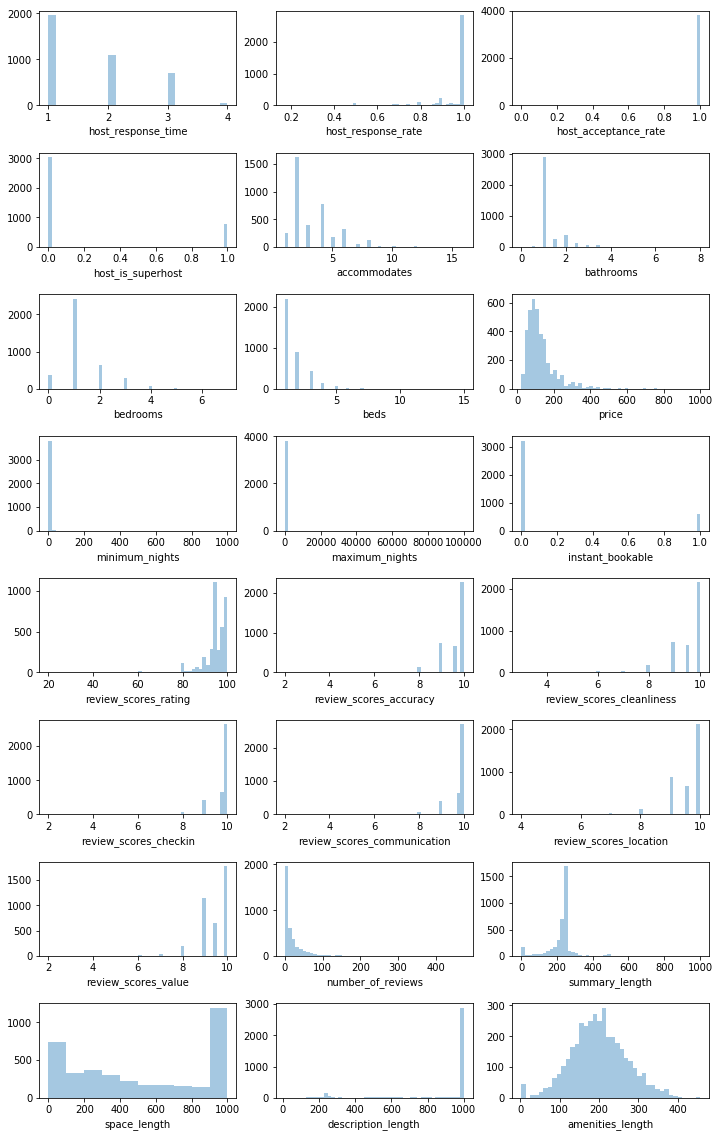

In [253]:
# Set the number of graphs in the facet chart
graphs = len(df_num_variables)-1

# Create a list of positions for the chart
position = []
for i in range(8):
    for j in range(3):
        b = i, j
        position.append(b)

# Create base of subplot chart.. rows x columbs = graphs
fig, axes = plt.subplots(nrows=8, ncols=3, sharey=False, sharex=False,
                         figsize=(12, 20))
fig.subplots_adjust(hspace=.5)

# Fill in base with graphs based off of position
for i in range(graphs):
    sns.distplot(df_num[df_num_variables[i]], ax=axes[position[i]], kde=False)

### Extracting Feature Importance

In [298]:
model = GradientBoostingRegressor(random_state=60)

model.fit(X_train, y_train)



### Price predection

In [321]:
# Look  at Correlation between variables
corr = df_lst.corr()
# Get review_scores_rating corr
corr['price'].sort_values(ascending=False)

price                          1.000000
accommodates                   0.652218
bedrooms                       0.627512
beds                           0.589701
bathrooms                      0.515867
amenities_length               0.165247
has_security_deposit           0.164001
has_cleaning_fee               0.161875
space_length                   0.091669
host_response_time             0.069188
review_scores_location         0.068178
review_scores_rating           0.050488
review_scores_cleanliness      0.049385
minimum_nights                 0.017297
review_scores_accuracy         0.017278
host_is_superhost              0.012131
review_scores_communication    0.011802
review_scores_checkin          0.007154
host_acceptance_rate           0.005915
maximum_nights                -0.003336
description_length            -0.006758
host_response_rate            -0.013018
summary_length                -0.028266
instant_bookable              -0.031712
review_scores_value           -0.037939


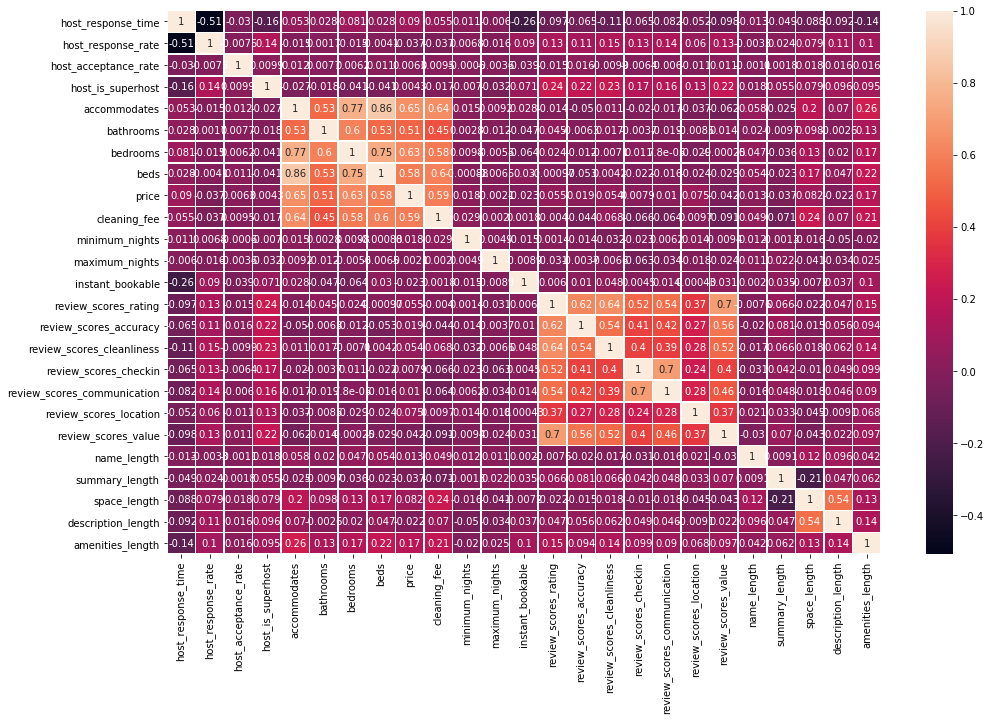

In [284]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(16, 10))
corr = (corr)
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax, annot=True)

The price Biggest correlates so far 
accommodates                   
bedrooms                       
cleaning_fee                   
beds                           
bathrooms                      

In [256]:
# Inspect Categorical Features values
print('- neighbourhood_group_cleansed values : ', list(df_lst['neighbourhood_group_cleansed'].unique()))
print('- property_type values : ', list(df_lst['property_type'].unique()))
print('- room_type values : ', list(df_lst['room_type'].unique()))
print('- bed_type values : ', list(df_lst['bed_type'].unique()))
print('- cancellation_policy values : ', list(df_lst['cancellation_policy'].unique()))

- neighbourhood_group_cleansed values :  ['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade', 'Central Area', 'University District', 'Downtown', 'Magnolia', 'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley', 'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill', 'Lake City']
- property_type values :  ['Apartment', 'House', 'Other', 'Condominium']
- room_type values :  ['Entire home/apt', 'Private room', 'Shared room']
- bed_type values :  ['Real Bed', 'Other']
- cancellation_policy values :  ['moderate', 'strict', 'flexible']


In [322]:
# Convert categorical fields to dummy variables
df_p_model = pd.get_dummies(df_lst, columns=['neighbourhood_group_cleansed',
                                             'property_type', 'room_type',
                                             'bed_type',
                                             'cancellation_policy'])

In [323]:
df_p_model.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Other,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,...,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,1.696176,0.948855,0.999738,0.203772,3.349398,1.258643,1.308015,1.735726,127.976166,2.369303,...,0.453903,0.074908,0.665532,0.303824,0.030644,0.042169,0.957831,0.301205,0.327658,0.371137
std,0.810199,0.119904,0.016184,0.402854,1.977599,0.589365,0.883252,1.139514,90.250022,16.305902,...,0.497936,0.263278,0.471866,0.459968,0.172375,0.201000,0.201000,0.458842,0.469421,0.483172
min,1.000000,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,20.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.980000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,75.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,100.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,2.000000,2.000000,150.000000,2.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,1.000000,1.000000,1.000000,16.000000,8.000000,7.000000,15.000000,1000.000000,1000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Moodling The Data

In [331]:
X = df_p_model.drop(['price'], axis=1) #features 
y = df_p_model['price'] # price

<h3>Scaling Features</3>

In [332]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X)

In [340]:
#Split the data into training and test sets. 80% of the data will be used for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3054 samples.
Testing set has 764 samples.


### Implementation - Creating a Training and Predicting Pipeline

### Supervised Learning Models
The following are some of the supervised learning models for regression problem that I will test on the data:<br>
LinearRegression<br>
Random Forest<br>
Gradient Boosted Regression<br>

In [425]:
lm_model = LinearRegression() 
lm_model.fit(X_train, y_train) 
y_testlr_preds = lm_model.predict(X_test)

y_trainlr_preds = lm_model.predict(X_train)


r2_score_lr_train = r2_score(y_train, y_trainlr_preds)
r2_score_lr_test =  r2_score(y_test, y_testlr_preds)
print('R2 score (Linear Regression, Train Data):{}'.format(r2_score_lr_train))
print('R2 score (Linear Regression, Test Data):{}'.format(r2_score_lr_test))
print('MSE (Linear Regression, Test Data):', np.sqrt(mean_squared_error(y_test, y_testlr_preds)))

R2 score (Linear Regression, Train Data):0.5735229612669484
R2 score (Linear Regression, Test Data):0.5873683826114235
MSE (Linear Regression, Test Data): 57.87092556669012


In [348]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_testlr_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,55.0,52.494906,2.505094
1,82.0,172.242887,-90.242887
2,68.0,56.313450,11.686550
3,58.0,78.952423,-20.952423
4,130.0,93.405049,36.594951


In [397]:
rf_model = RandomForestRegressor(random_state=60)
rf_model.fit(X_train, y_train) 
y_testrf_preds = rf_model.predict(X_test)
y_trianrf_preds = rf_model.predict(X_train)

r2_score_rf_train = r2_score(y_train, y_trianrf_preds)
r2_score_rf_test =  r2_score(y_test, y_testrf_preds)
print('R2 score (Random Forest, Train Data):{}'.format(r2_score_rf_train))
print('R2 score (Random Forest, Test Data):{}'.format(r2_score_rf_test))

print('MSE (Random Forest, Test Data):', np.sqrt(mean_squared_error(y_test, y_testrf_preds)))


R2 score (Random Forest, Train Data):0.9383960845666502
R2 score (Random Forest, Test Data):0.6064707351446903
MSE (Random Forest, Test Data): 56.5155156405317


In [398]:
gb_model = GradientBoostingRegressor(random_state=60)
gb_model.fit(X_train, y_train) 
y_testgb_preds = gb_model.predict(X_test)
y_triangb_preds = gb_model.predict(X_train)

r2_score_gb_train = r2_score(y_train, y_triangb_preds)
r2_score_gb_test =  r2_score(y_test, y_testgb_preds)
print('R2 score (Gradient Boosting, Train Data):{}'.format(r2_score_gb_train))
print('R2 score (Gradient Boosting, Test Data):{}'.format(r2_score_gb_test))

print('MSE (Gradient Boosting, Test Data):', np.sqrt(mean_squared_error(y_test, y_testgb_preds)))


R2 score (Gradient Boosting, Train Data):0.7314722219108649
R2 score (Gradient Boosting, Test Data):0.6168230637373859
MSE (Gradient Boosting, Test Data): 55.76720230238554


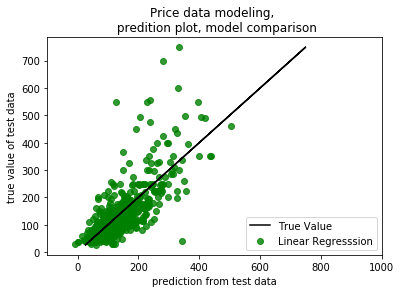

In [383]:
# Plot again with x-axis range adjustment
plt.scatter(y_testlr_preds, y_test, c='green',
            alpha=0.8, label='Linear Regresssion')
plt.xlabel('prediction from test data')
plt.ylabel('true value of test data')
plt.xlim(left=-100, right=1000)
plt.plot(y_test, y_test, c='black', label='True Value')
plt.legend()
plt.title('Price data modeling, \n predition plot, model comparison')
plt.show()

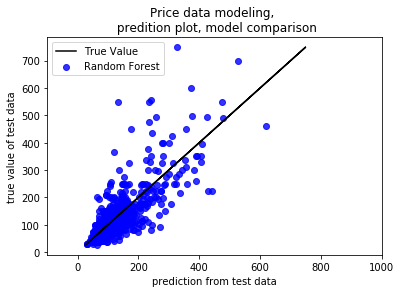

In [385]:
# Plot again with x-axis range adjustment
plt.scatter(y_testrf_preds, y_test, c='blue',
            alpha=0.8, label='Random Forest')
plt.xlabel('prediction from test data')
plt.ylabel('true value of test data')
plt.xlim(left=-100, right=1000)
plt.plot(y_test, y_test, c='black', label='True Value')
plt.legend()
plt.title('Price data modeling, \n predition plot, model comparison')
plt.show()

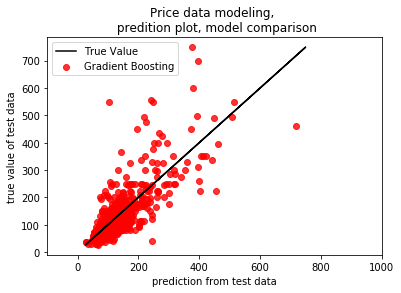

In [431]:
# Plot again with x-axis range adjustment
plt.scatter(y_testgb_preds, y_test, c='red',
            alpha=0.8, label='Gradient Boosting')
plt.xlabel('prediction from test data')
plt.ylabel('true value of test data')
plt.xlim(left=-100, right=1000)
plt.plot(y_test, y_test, c='black', label='True Value')
plt.legend()
plt.title('Price data modeling, \n predition plot, model comparison')
plt.show()

Looks like each model is predicting better in lower price range than higher price range.

In [392]:
# Extract the feature importances using Linear Regression
importances = lr_model.feature_importances_

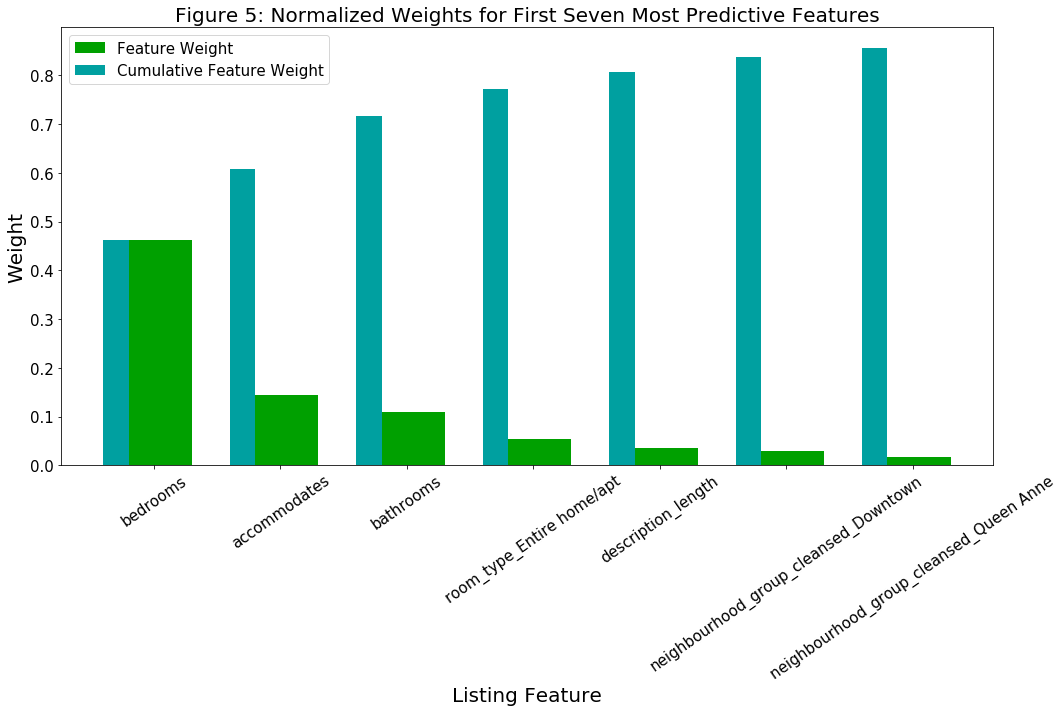

In [429]:
# Display the seven most important features
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:7]]
values = importances[indices][:7]
# Creat the plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, aspect='auto')
plt.title("Figure 5: Normalized Weights for First Seven Most Predictive Features",
          fontsize=20)
plt.bar(np.arange(7), values, width=0.6, align="center", color='#00A000',
        label="Feature Weight")
plt.bar(np.arange(7)-0.3, np.cumsum(values), width=0.2, align="center",
        color='#00A0A0', label="Cumulative Feature Weight")
plt.xticks(np.arange(7), columns, rotation=45, fontsize=15)
ax.set_xlabel('Listing Feature', weight='normal', size=20)
ax.set_ylabel('Weight', weight='normal', size=20)
# Set tick label properties
ax.tick_params('x', labelsize=15, rotation=35)
ax.tick_params('y', labelsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

In [389]:
# Extract the feature importances using Random Forest 
importances_rf = rf_model.feature_importances_

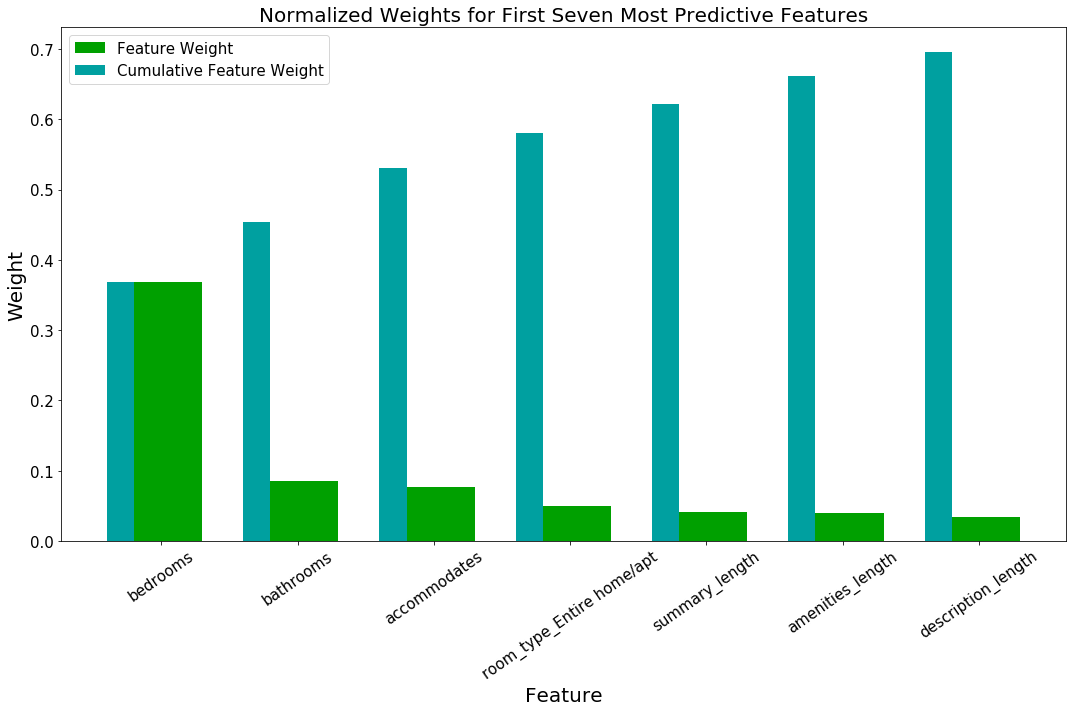

In [391]:
# Display the seven most important features
indices = np.argsort(importances_rf)[::-1]
columns = X_train.columns.values[indices[:7]]
values = importances_rf[indices][:7]
# Creat the plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, aspect='auto')
plt.title("Normalized Weights for First Seven Most Predictive Features",
          fontsize=20)
plt.bar(np.arange(7), values, width=0.6, align="center", color='#00A000',
        label="Feature Weight")
plt.bar(np.arange(7)-0.3, np.cumsum(values), width=0.2, align="center",
        color='#00A0A0', label="Cumulative Feature Weight")
plt.xticks(np.arange(7), columns, rotation=45, fontsize=15)
ax.set_xlabel('Feature', weight='normal', size=20)
ax.set_ylabel('Weight', weight='normal', size=20)
# Set tick label properties
ax.tick_params('x', labelsize=15, rotation=35)
ax.tick_params('y', labelsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

In [394]:
# Extract the feature importances using Gradient Boosting
importances_gb = gb_model.feature_importances_

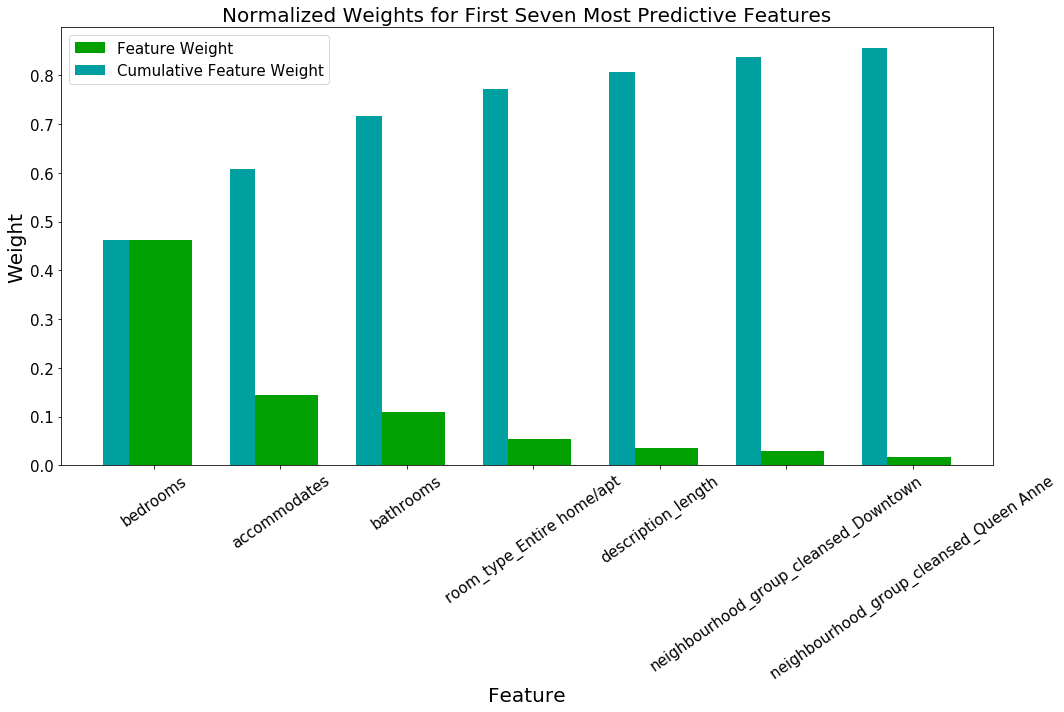

In [395]:
# Display the seven most important features
indices = np.argsort(importances_gb)[::-1]
columns = X_train.columns.values[indices[:7]]
values = importances_gb[indices][:7]
# Creat the plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, aspect='auto')
plt.title("Normalized Weights for First Seven Most Predictive Features",
          fontsize=20)
plt.bar(np.arange(7), values, width=0.6, align="center", color='#00A000',
        label="Feature Weight")
plt.bar(np.arange(7)-0.3, np.cumsum(values), width=0.2, align="center",
        color='#00A0A0', label="Cumulative Feature Weight")
plt.xticks(np.arange(7), columns, rotation=45, fontsize=15)
ax.set_xlabel('Feature', weight='normal', size=20)
ax.set_ylabel('Weight', weight='normal', size=20)
# Set tick label properties
ax.tick_params('x', labelsize=15, rotation=35)
ax.tick_params('y', labelsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

### Result
Depending on the run, the LinearRegression performs the best followed by the Gradient Boosting<br>
Answer for Q3: <br>
1-Linear Regression R2 score is 0.587, from trainig data predition(0.573) and the accuracy score 58% of test data which is best among three models.

2-Random Forest R2 score is 0.606. From trainig data predition and test data prediction difference, we could say the model is over fitting a little.<br>
3-Gradient Boosting R2 score is 0.616.

Regarding the Linear Regression model, important features for price prediction is as follows.<br>
1-Number of bedrooms<br>
2-Number of accommodates<br>
3-Bathrooms<br>
4-Room Type (Entire home/apt)<br>
5-Length of decription<br>
6-Neighbourhood_group_cleansed<br>      